In [12]:
import h5py
from mpl_toolkits import mplot3d
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from numpy import array
from multiset import Multiset
import pandas as pd


In [44]:
dat = h5py.File('global_sample_data_snapshot_1200.hdf5')

# for x in dat.values():
#     try:
#         list(x)
#     except:
#         print(x)
#         raise
dat = pd.DataFrame((list(x) for x in dat.values() if x.shape != ()), index=(k for k in dat.keys() if dat[k].shape != ())).transpose()

In [48]:
dat

,Mgas_ahf_cat,Mstar_ahf_cat,Mvir_ahf_cat,Redge,Redge_ahf,Rvir,Rvir_ahf,Rvir_ahf_cat,Xc_ahf_cat,Yc_ahf_cat,...,stellar_velocity_dispersion_los_z_within_r50,stellar_velocity_dispersion_los_z_within_r50_ahf,stellar_velocity_dispersion_los_z_within_r80,stellar_velocity_dispersion_los_z_within_r80_ahf,x_cm,x_cm_ahf,y_cm,y_cm_ahf,z_cm,z_cm_ahf
0,9.512860e+11,6.012280e+11,1.196040e+13,29.338589,29.338589,464.03,464.03,464.03,14711.058140,12986.948490,...,259.562170,259.562170,257.566324,257.566324,0.0,0.0,0.0,0.0,0.0,0.0
1,8.225730e+11,5.471810e+11,9.190950e+12,44.675458,44.675458,425.03,425.03,425.03,7908.847332,11816.418171,...,271.048758,271.048758,270.573159,270.573159,0.0,0.0,0.0,0.0,0.0,0.0
2,5.407820e+11,6.436700e+11,8.386820e+12,126.069141,126.069141,412.25,412.25,412.25,14807.960987,14623.553753,...,237.823634,237.823634,234.930793,234.930793,0.0,0.0,0.0,0.0,0.0,0.0
3,2.871070e+11,4.191250e+11,4.844970e+12,504.881648,504.881662,343.34,343.34,343.34,873.863697,14724.276066,...,295.305677,295.305677,285.986884,285.986827,0.0,0.0,0.0,0.0,0.0,0.0
4,2.366870e+11,2.783600e+11,4.160950e+12,43.142288,43.142288,326.36,326.36,326.36,10670.664310,14930.469990,...,255.519159,255.519159,251.522571,251.522571,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1715,0.000000e+00,1.045510e+07,1.541840e+08,14.521914,14.521914,10.88,10.88,10.88,14459.381104,12862.701416,...,3.558392,3.578857,3.365012,3.283210,0.0,0.0,0.0,0.0,0.0,0.0
1716,0.000000e+00,6.139160e+06,1.737100e+08,8.795622,8.731912,6.77,6.77,6.77,14706.802368,13045.578003,...,157.798219,10.723944,195.162070,10.638386,0.0,0.0,0.0,0.0,0.0,0.0
1717,0.000000e+00,5.170780e+06,1.477650e+08,16.317195,16.289510,11.32,11.32,11.32,14655.075073,14626.235962,...,32.313106,9.694861,84.987186,8.732256,0.0,0.0,0.0,0.0,0.0,0.0
1718,0.000000e+00,4.018140e+06,1.093740e+08,13.768929,13.533950,9.70,9.70,9.70,14755.439758,14735.984802,...,0.533630,14.814646,39.167816,11.727622,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
def sates(arr):
    return np.fromiter((n for i, n in enumerate(arr) if dat['groupID'][i] != -1), dtype=float)

def hosts(arr):
    return np.fromiter((n for i, n in enumerate(arr) if dat['groupID'][i] == -1), dtype=float)

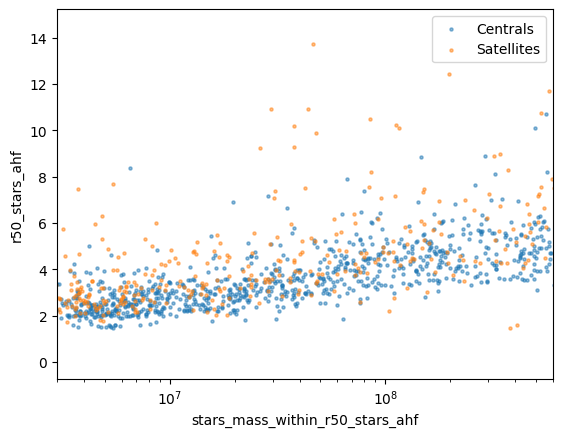

In [45]:

fig = plt.figure()
ax = plt.axes()

ax.set_xscale('log')
#ax.set_yscale('log')

x, y = dat['stars_mass_within_r50_stars_ahf'], dat['r50_stars_ahf']

ax.scatter(hosts(x), hosts(y), alpha=0.5, s=5)
ax.scatter(sates(x), sates(y), alpha=0.5, s=5)
ax.set_xlim(3e6, 6e8)
#ax.set_ylim(1e6, 6e9)
ax.legend(('Centrals', 'Satellites'))
ax.set_xlabel('stars_mass_within_r50_stars_ahf')
ax.set_ylabel(   'r50_stars_ahf')
fig.savefig('out.png')

In [46]:
list(x for x in dat.keys() if x.startswith('r50'))

['r50_dm',
 'r50_dm_ahf',
 'r50_gas',
 'r50_gas_ahf',
 'r50_stars',
 'r50_stars_ahf']

In [15]:
prox = dat['x_cm_ahf']

<HDF5 dataset "x_cm_ahf": shape (1720,), type "<f8">

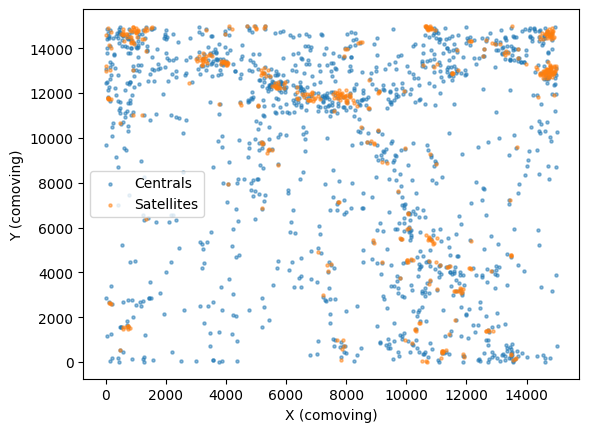

In [47]:
fig, ax = plt.subplots()

#ax.set_xscale('log')
#ax.set_yscale('log')

x, y = dat['Xc_ahf_cat'], dat['Yc_ahf_cat']

ax.scatter(hosts(x), hosts(y),  alpha=0.5, s=5)
ax.scatter(sates(x), sates(y),  alpha=0.5, s=5)
#ax.set_xlim(3e6, 6e8)
#ax.set_ylim(1e6, 6e9)
ax.legend(('Centrals', 'Satellites'))
ax.set_xlabel('X (comoving)')
ax.set_ylabel('Y (comoving)')
fig.savefig('out.png')